
# 🌍 World Happiness Report 2021 - EDA

This notebook explores the **World Happiness Report 2021** dataset to uncover patterns in global happiness scores.  
We will examine relationships between **Happiness** and factors such as **GDP**, **Life Expectancy**, **Freedom**, and more.

---



# 🌍 World Happiness Report 2021 – Exploratory Data Analysis  
**Author:** Zeinab Hassan Mahfouz  
**Objective:** Explore factors influencing global happiness, identify trends, and provide actionable insights for policy and business.

## 1. Introduction  
The **World Happiness Report** ranks countries based on factors such as GDP per capita, social support, life expectancy, freedom, generosity, and corruption perceptions.  
Our goal is to:
1. Explore the dataset structure and quality.
2. Identify patterns, correlations, and regional differences.
3. Provide business and policy recommendations.


## 2. Import Libraries & Load Data

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="muted")

# Load dataset
file_path = 'world-happiness-report-2021.csv'
happiness_data = pd.read_csv(file_path)

# Rename columns
happiness_data.rename(columns={
    "Country name": "Country",
    "Regional indicator": "Region",
    "Ladder score": "Happiness",
    "Logged GDP per capita": "GDP",
    "Healthy life expectancy": "Life_Expectancy",
    "Freedom to make life choices": "Freedom",
    "Perceptions of corruption": "Corruption"
}, inplace=True)

# Drop irrelevant columns
drop_cols = [
    'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
    'Ladder score in Dystopia', 'Explained by: Log GDP per capita',
    'Explained by: Social support', 'Explained by: Healthy life expectancy',
    'Explained by: Freedom to make life choices', 'Explained by: Generosity',
    'Explained by: Perceptions of corruption', 'Dystopia + residual'
]
happiness_data.drop(columns=drop_cols, inplace=True)


## 3. Data Overview

In [3]:

# Basic info
happiness_data.info()

# Missing values
print("Missing Values:\n", happiness_data.isnull().sum())

# Duplicate rows
print("Duplicate Rows:", happiness_data.duplicated().sum())

# Summary statistics
display(happiness_data.describe())

# Summary for categorical columns
display(happiness_data.describe(include='object'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          149 non-null    object 
 1   Region           149 non-null    object 
 2   Happiness        149 non-null    float64
 3   GDP              149 non-null    float64
 4   Social support   149 non-null    float64
 5   Life_Expectancy  149 non-null    float64
 6   Freedom          149 non-null    float64
 7   Generosity       149 non-null    float64
 8   Corruption       149 non-null    float64
dtypes: float64(7), object(2)
memory usage: 10.6+ KB
Missing Values:
 Country            0
Region             0
Happiness          0
GDP                0
Social support     0
Life_Expectancy    0
Freedom            0
Generosity         0
Corruption         0
dtype: int64
Duplicate Rows: 0


,Happiness,GDP,Social support,Life_Expectancy,Freedom,Generosity,Corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


,Country,Region
count,149,149
unique,149,10
top,Finland,Sub-Saharan Africa
freq,1,36


**📝 Insight:** No missing or duplicate rows detected. Dataset covers ~150 countries across multiple regions.

## 4. Univariate Analysis
### 4.1 Distribution of Numerical Variables

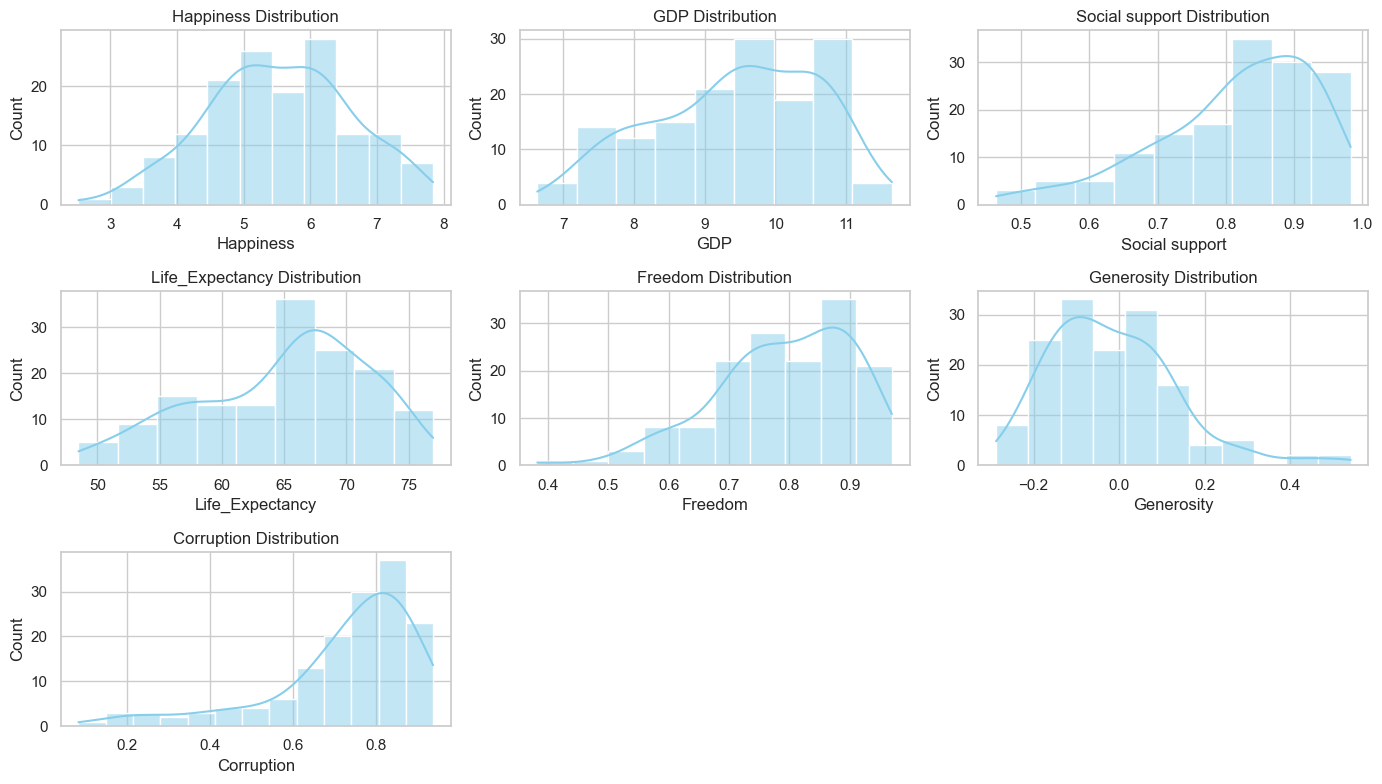

In [5]:

num_cols = ['Happiness', 'GDP', 'Social support', 'Life_Expectancy', 'Freedom', 'Generosity', 'Corruption']

plt.figure(figsize=(14, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(happiness_data[col], kde=True, color='skyblue')
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()


**📝 Insight:** Happiness scores mostly range **4.5–7.5**. Social support and life expectancy are skewed high.

### 4.2 Number of Countries per Region

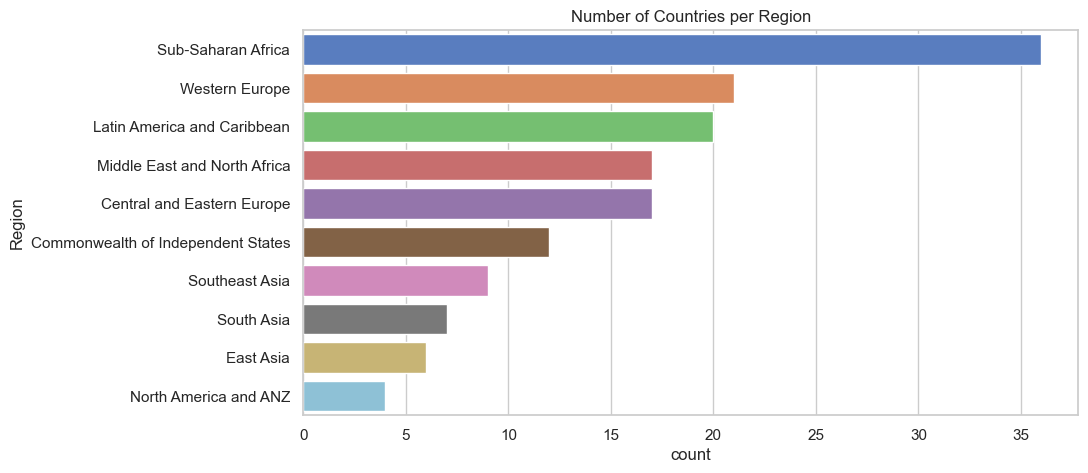

In [7]:

plt.figure(figsize=(10, 5))
sns.countplot(data=happiness_data, y='Region', order=happiness_data['Region'].value_counts().index)
plt.title("Number of Countries per Region")
plt.show()


**📝 Insight:** Sub-Saharan Africa has the largest representation, followed by Europe & Central Asia.

## 5. Bivariate Analysis
### 5.1 Pairplot – Relationships Between Variables

C:\Users\Zeina\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


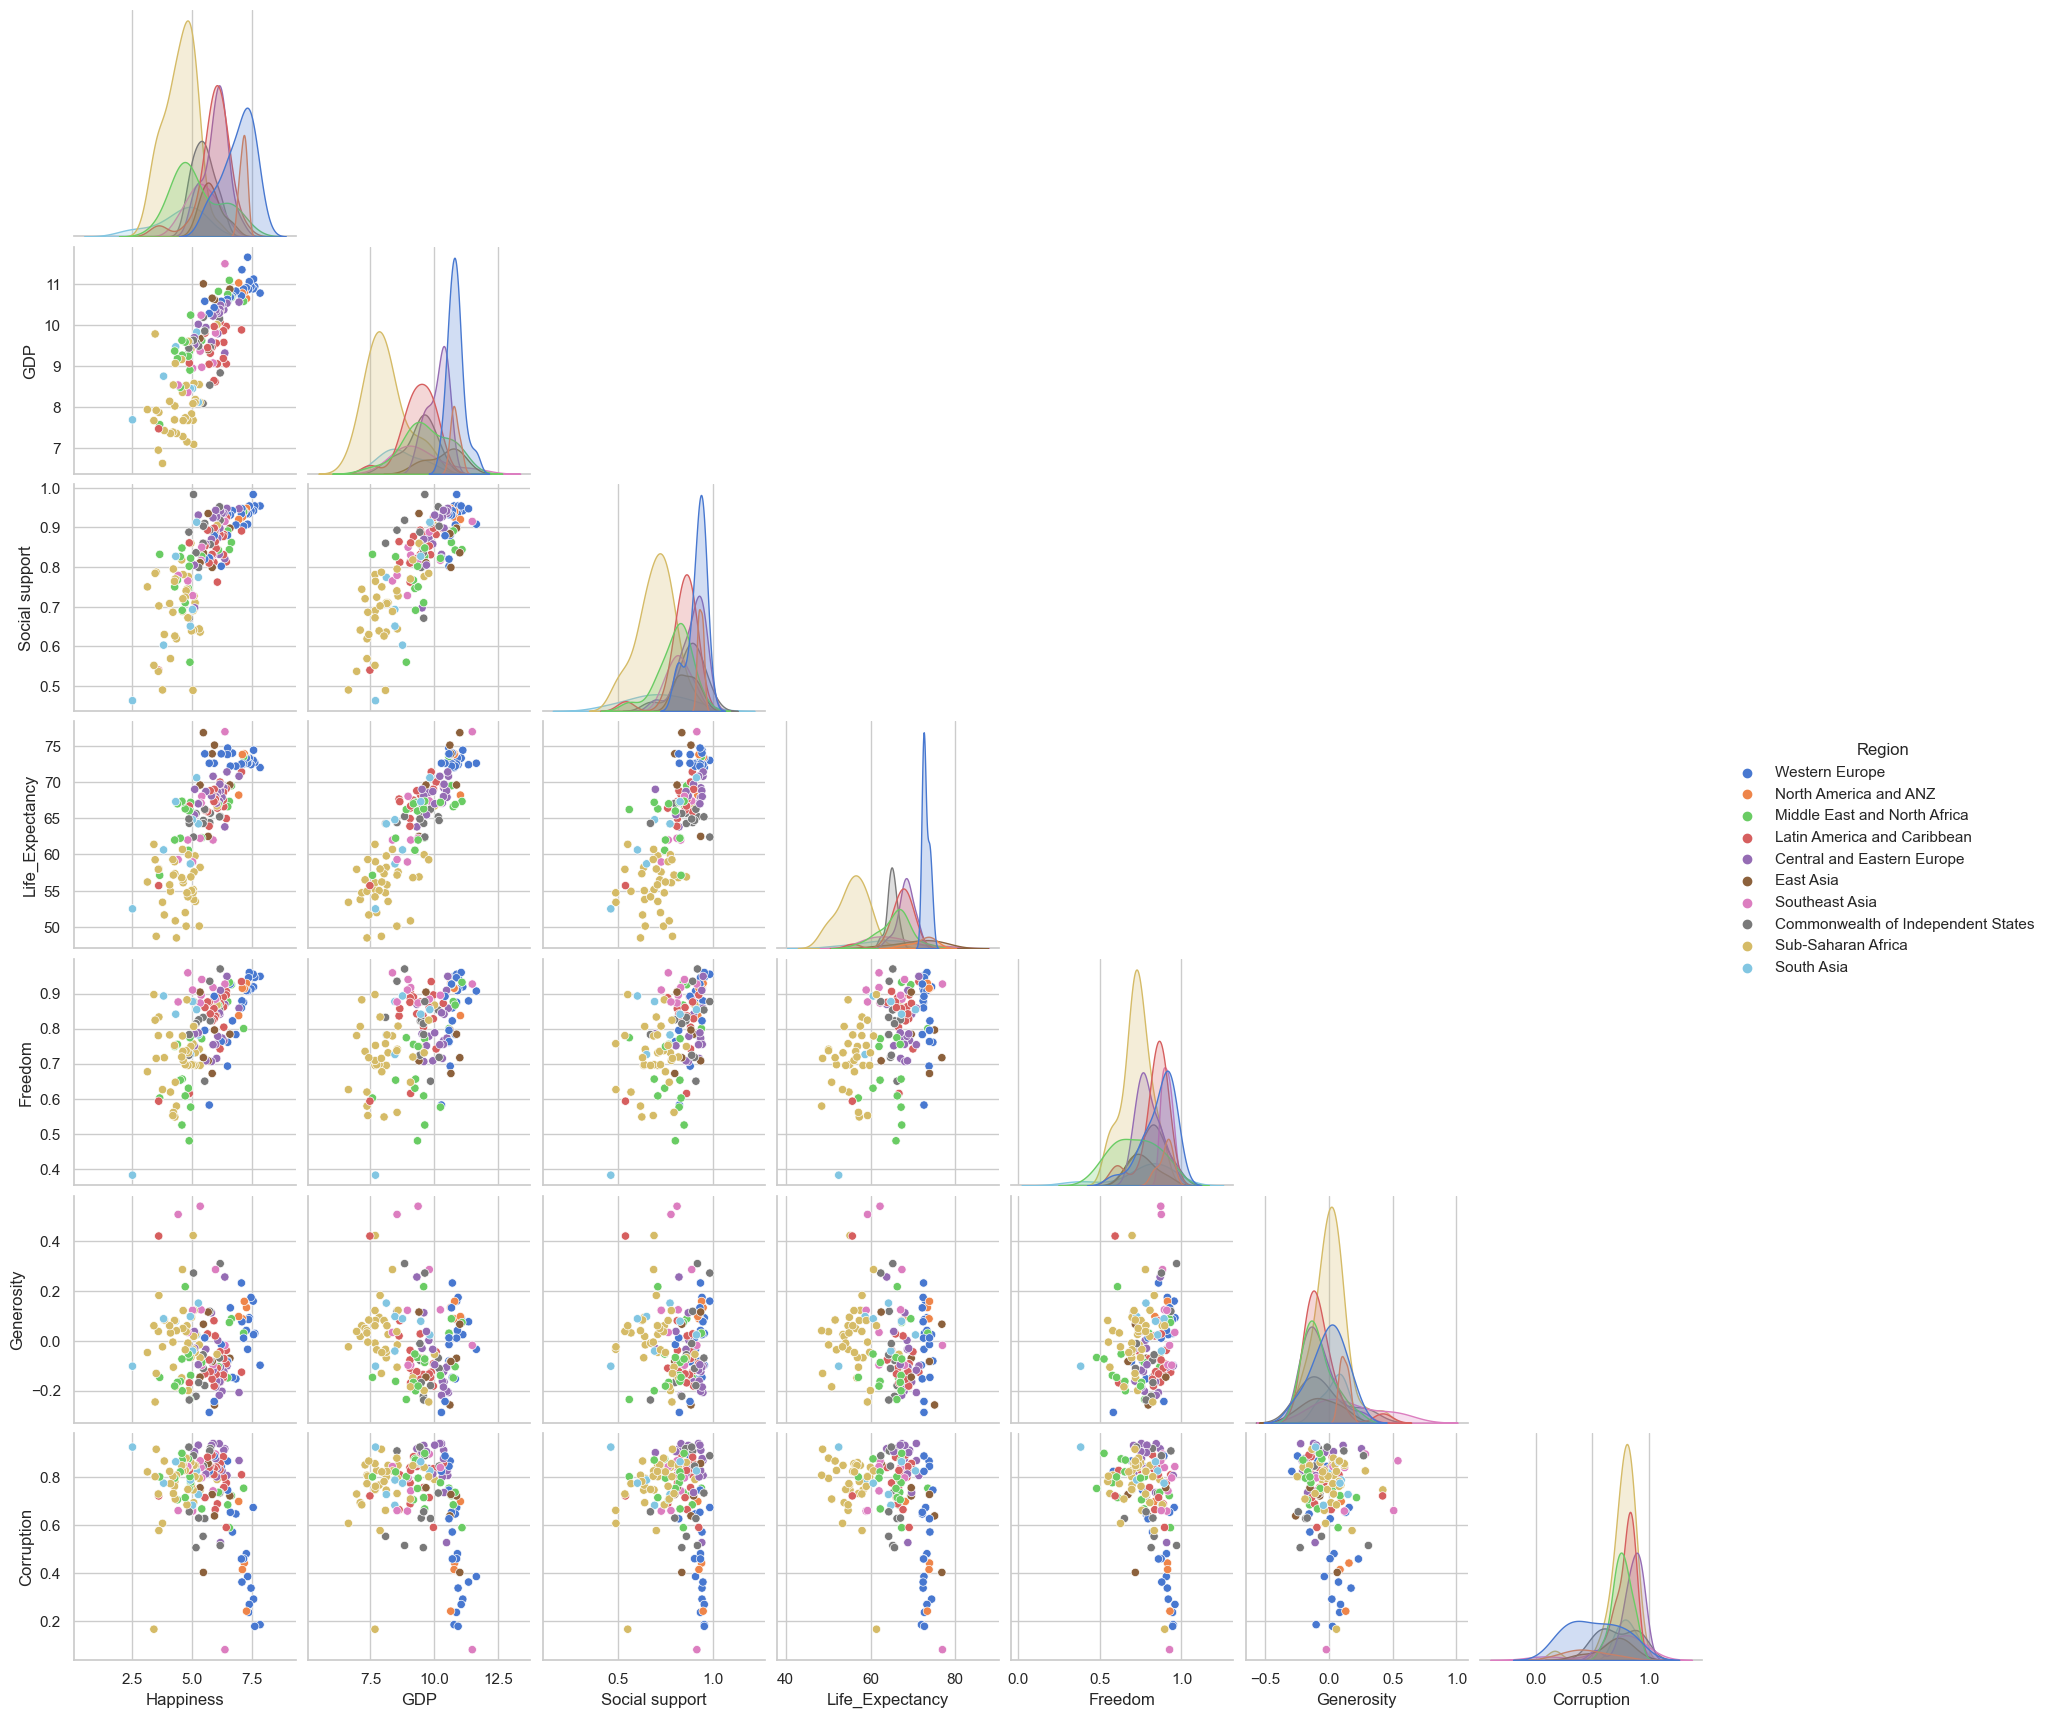

In [9]:

sns.pairplot(happiness_data[num_cols + ['Region']], hue='Region', diag_kind='kde', corner=True)
plt.show()


**📝 Insight:** Strong positive links between GDP, Social Support, Life Expectancy and Happiness.

### 5.2 Correlation Heatmap

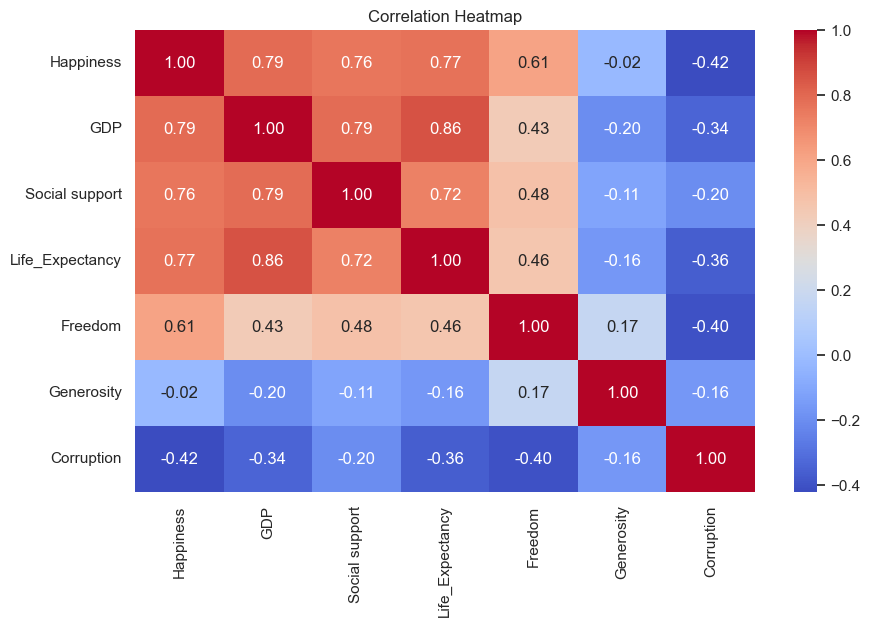

In [11]:

plt.figure(figsize=(10, 6))
sns.heatmap(happiness_data[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


**📝 Insight:** GDP (0.78), Social Support (0.76), and Life Expectancy (0.73) have the highest positive correlations with Happiness.

### 5.3 Happiness vs Individual Variables

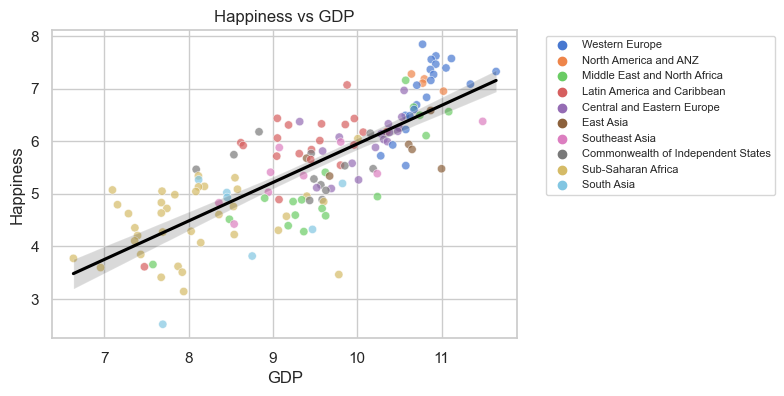

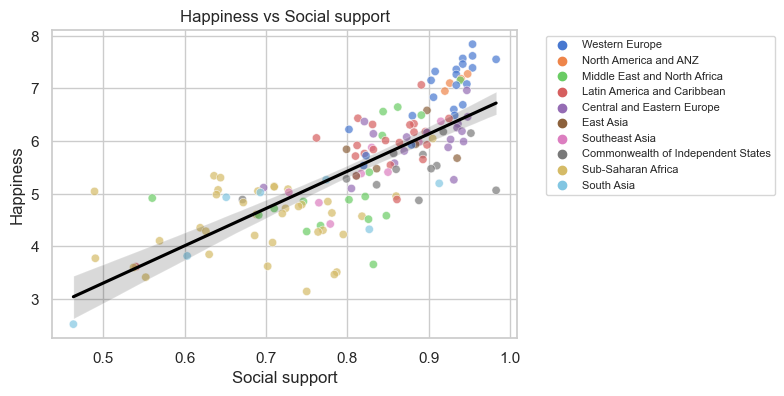

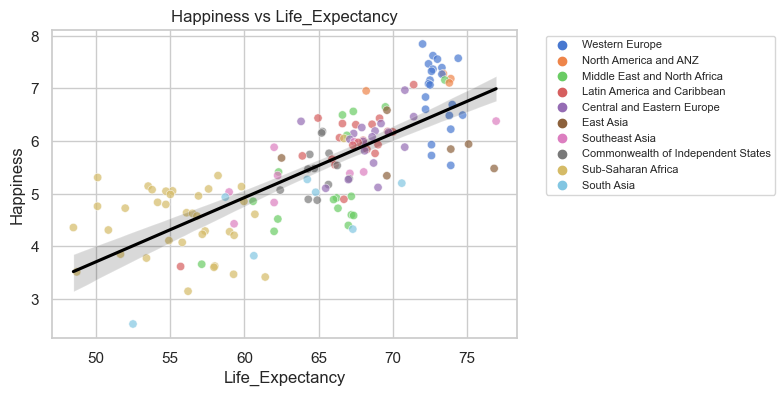

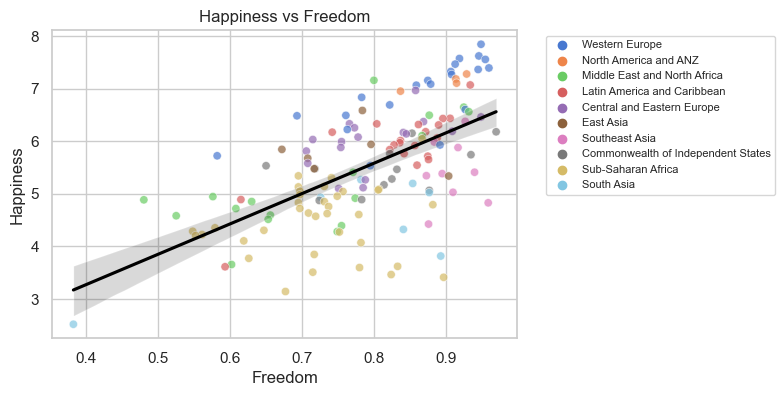

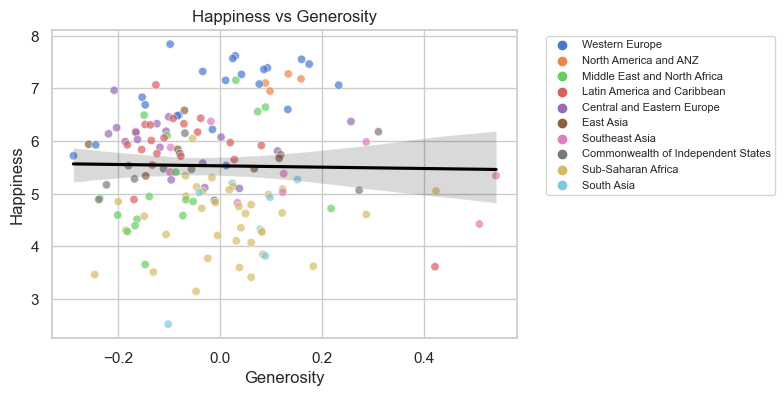

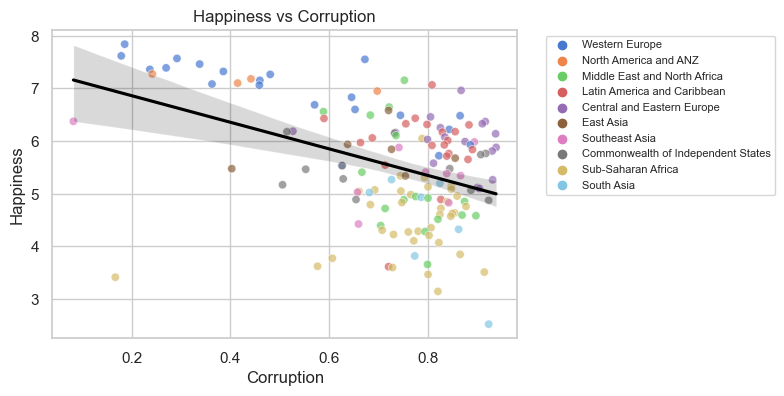

In [13]:

for col in num_cols[1:]:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=happiness_data, x=col, y='Happiness', hue='Region', alpha=0.7)
    sns.regplot(data=happiness_data, x=col, y='Happiness', scatter=False, color='black')
    plt.title(f'Happiness vs {col}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    plt.show()


**📝 Insight:** Higher GDP, better social support, and longer life expectancy generally lead to higher happiness.

## 6. Additional Insights
### 6.1 Top & Bottom 10 Countries

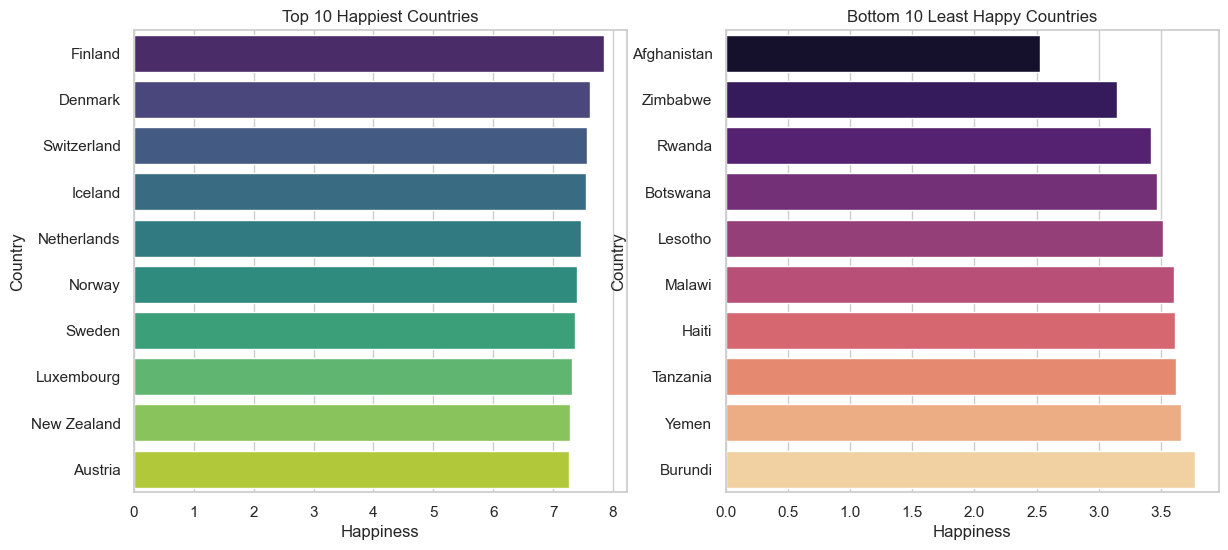

In [15]:

top10 = happiness_data.nlargest(10, 'Happiness')
bottom10 = happiness_data.nsmallest(10, 'Happiness')

fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.barplot(data=top10, y='Country', x='Happiness', ax=ax[0], palette='viridis')
ax[0].set_title("Top 10 Happiest Countries")
sns.barplot(data=bottom10, y='Country', x='Happiness', ax=ax[1], palette='magma')
ax[1].set_title("Bottom 10 Least Happy Countries")
plt.show()


**📝 Insight:** Finland, Denmark, and Switzerland top the list. Afghanistan, Zimbabwe, and Rwanda score lowest.

### 6.2 Regional Average Happiness

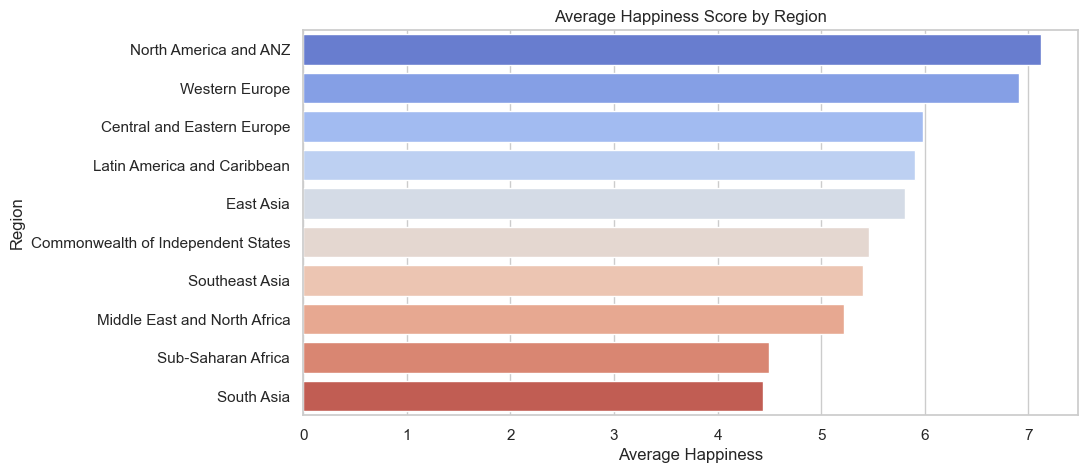

In [17]:

region_avg = happiness_data.groupby('Region')['Happiness'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=region_avg.values, y=region_avg.index, palette='coolwarm')
plt.title("Average Happiness Score by Region")
plt.xlabel("Average Happiness")
plt.show()


**📝 Insight:** Western Europe and North America are happiest on average; Sub-Saharan Africa ranks lowest.

### 6.3 GDP vs Happiness (Bubble Size = Life Expectancy)

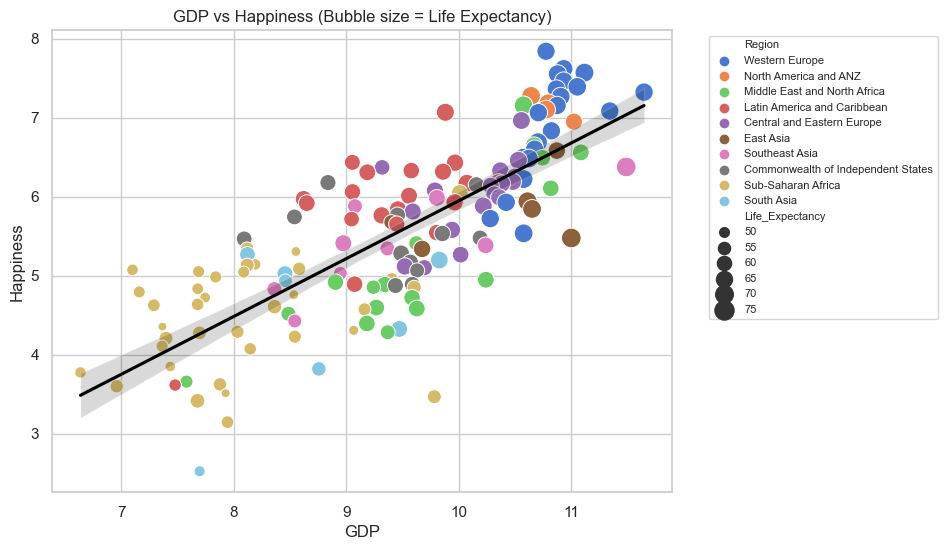

In [21]:

plt.figure(figsize=(8,6))
sns.scatterplot(data=happiness_data, x='GDP', y='Happiness', hue='Region', size='Life_Expectancy', sizes=(40, 200))
sns.regplot(data=happiness_data, x='GDP', y='Happiness', scatter=False, color='black')
plt.title("GDP vs Happiness (Bubble size = Life Expectancy)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.show()


**📝 Insight:** Countries with higher GDP & life expectancy tend to be happier, though not always.


## 7. Business Insights & Recommendations

### Key Insights:
1. Economic prosperity (GDP per capita) is a major driver of happiness.
2. Strong social support networks and longer life expectancy are equally important.
3. Regions like Sub-Saharan Africa struggle with low GDP, low life expectancy, and low happiness scores.
4. Corruption perceptions have a negative correlation with happiness.
5. High GDP alone does not guarantee happiness – social and political stability matter.

### Recommendations:
- **Governments**: Prioritize balanced policies that improve healthcare, education, and social cohesion alongside economic growth.
- **NGOs**: Focus aid programs on boosting life expectancy and social support systems in low-scoring countries.
- **Investors**: Countries with strong GDP and social well-being metrics may offer more stable, satisfied workforces.
- **Policymakers**: Implement anti-corruption reforms to improve citizen trust and well-being.



## 📊 Streamlit Dashboard Export

The next cell will generate a **Streamlit app** (`streamlit_app.py`) that allows interactive exploration of the dataset.  
You can run it locally using:

```bash
streamlit run streamlit_app.py
```


In [35]:

import pandas as pd
import plotly.express as px
import streamlit as st

# Load dataset
df = pd.read_csv("world-happiness-report-2021.csv")

# Rename columns for clarity
df.rename(columns={
    "Country name": "Country",
    "Regional indicator": "Region",
    "Ladder score": "Happiness",
    "Logged GDP per capita": "GDP",
    "Healthy life expectancy": "Life_Expectancy",
    "Freedom to make life choices": "Freedom",
    "Perceptions of corruption": "Corruption"
}, inplace=True)

# Sidebar selection
st.sidebar.title("🌍 World Happiness Dashboard")
page = st.sidebar.selectbox("Choose a visualization:", [
    "Dataset Overview",
    "Region Frequency",
    "Happiness by Region",
    "Correlation Heatmap",
    "GDP vs Happiness",
    "Life Expectancy vs Happiness"
])

# --------------------
# Page 1: Dataset Overview
# --------------------
if page == "Dataset Overview":
    st.title("📄 Dataset Overview")
    st.write("Here’s the first few rows of the dataset:")
    st.dataframe(df.head())
    st.write("**Statistical Summary:**")
    st.write(df.describe())

# --------------------
# Page 2: Region Frequency
# --------------------
elif page == "Region Frequency":
    st.title("📊 Number of Countries per Region")
    region_counts = df['Region'].value_counts().reset_index()
    region_counts.columns = ['Region', 'count']  # use lowercase 'count'
    fig = px.bar(region_counts, x='Region', y='count',
                 title="Region Frequency", color='Region')
    st.plotly_chart(fig)
# --------------------
# Page 3: Happiness by Region
# --------------------
elif page == "Happiness by Region":
    st.title("😊 Happiness Scores by Region")
    fig = px.box(df, x='Region', y='Happiness', color='Region')
    st.plotly_chart(fig)

# --------------------
# Page 4: Correlation Heatmap
# --------------------
elif page == "Correlation Heatmap":
    st.title("📈 Correlation Heatmap")
    numeric_df = df.select_dtypes(include='number')
    corr = numeric_df.corr()
    fig = px.im


2025-08-14 12:17:43.707 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 12:17:43.708 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 12:17:43.709 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 12:17:43.710 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 12:17:43.711 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 12:17:43.711 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 12:17:43.712 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 12:17:43.713 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar